In [29]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import pandas as pd
import matplotlib.pyplot as plt
from configs import support_llms, support_llm_properties
import numpy as np
import matplotlib as mpl

df  = pd.read_pickle(f"{root_dir}/results/results.pkl")

df.head()

,_runtime,_step,_timestamp,_wandb,accuracy,calibrated_accuracy,consistency_rate,train_acc,seed,wandb,...,dataset_name,peft_variant,max_new_tokens,not_load_model,theory_example,theory_version,train_ml_model,system_prompt_name,run_name,run_id
0,608.820065,1999.0,1.733363e+09,{'runtime': 608},0.49750,0.0275,0.0600,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,fancy-rain-1,rws7x1ty
1,752.265414,1999.0,1.733364e+09,{'runtime': 752},0.51425,0.0760,0.1235,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,misty-frost-2,9n1ogm1l
2,5171.656271,1999.0,1.733368e+09,{'runtime': 5171},0.49675,0.0385,0.0405,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,denim-jazz-3,3qi1ixru
3,273.379546,1999.0,1.733363e+09,{'runtime': 273},0.60700,0.4520,0.6900,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,likely-yogurt-5,spxsot9y
4,1997.155615,1999.0,1.733365e+09,{'runtime': 1997},0.51175,0.0305,0.0375,NaN,42,True,...,relca,pretrained,1000,False,False,v4,,evaluator,exalted-resonance-6,8ixjdl3c


In [3]:
def get_row(**kwargs):
    condition = None
    for key, value in kwargs.items():

        if condition is None:
            condition = df[key] == value
        else:
            condition &= df[key] == value
    return df[condition].reset_index(drop=True)

In [85]:
plot_models 

['Llama-3.2-11B-Vision-Instruct',
 'Qwen2-VL-7B-Instruct',
 'Qwen2-VL-2B-Instruct',
 'Llama-3.1-8B-Instruct',
 'Mistral-7B-Instruct-v0.3',
 'pixtral-12b',
 'Qwen2.5-14B-Instruct',
 'pixtral-12b',
 'Llama-3.2-90B-Vision-Instruct',
 'Qwen2-VL-72B-Instruct',
 'Qwen2-VL-72B-Instruct',
 'Qwen2.5-72B-Instruct',
 'Llama-3.1-70B-Instruct',
 'Mistral-Large-Instruct-2407',
 'Mixtral-8x22B-Instruct-v0.1',
 'gpt-4o-mini',
 'gpt-4o',
 'gpt-4o',
 'gemini-1.5-pro']

# Standard, Multimodal, Pairwise

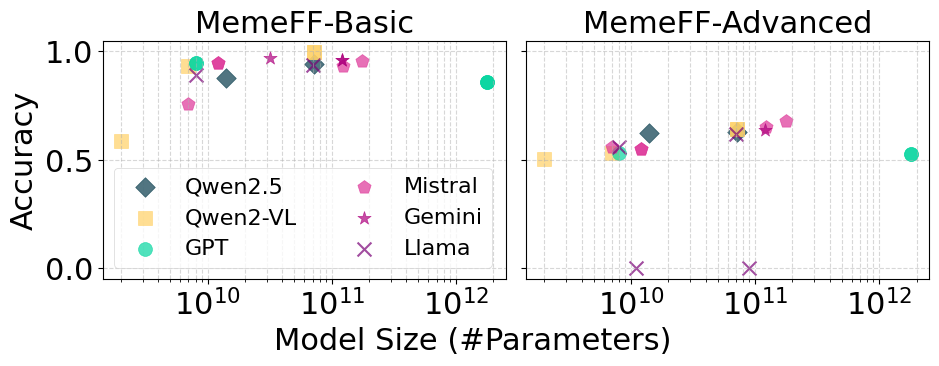

In [84]:
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.subplots_adjust(left=0.11, bottom=0.22, right=0.98, top=0.9, wspace=0.05) #margin of the figure
fig.set_size_inches(9.5, 3.5) #exact size of the figure

dataset_label = {
    'ours_v4': 'MemeFF-Basic',
    'relca_v2': 'MemeFF-Advanced'
}

for i, dataset_name in enumerate(['ours_v4', 'relca_v2']):
    smp_df = get_row(dataset_name=dataset_name, prompt_name='standard', eval_mode='pairwise', peft_variant = 'pretrained', n_demos = 0)

    plot_models = [model for model in smp_df['model_name'] if model in support_llm_properties and "model_size" in support_llm_properties[model]]

    # Group models by series
    qwen25_models = [m for m in plot_models if 'Qwen2.5' in m]
    qwen2vl_models = [m for m in plot_models if 'Qwen2-VL' in m]
    gpt_models = [m for m in plot_models if 'gpt' in m.lower()]
    mixtral_models = [m for m in plot_models if 'mixtral' in m.lower() or 'mistral' in m.lower() or 'pixtral' in m.lower()]
    gemini_models = [m for m in plot_models if 'gemini' in m.lower()]
    llama_models = [m for m in plot_models if 'llama' in m.lower()]
    other_models = [m for m in plot_models if m not in qwen25_models + qwen2vl_models + gpt_models + mixtral_models + gemini_models + llama_models]


    # Plot each series with different colors
    # '#FFD166','#06D6A0','#118AB2', '#DD3497', '#AE017E', '#7A0177', '#49006A'
    properties = {
        'qwen2.5': {'color': '#073B4C', 'marker': 'D'}, 
        'qwen2-vl': {'color': '#FFD166', 'marker': 's'}, 
        'gpt': {'color': '#06D6A0', 'marker': 'o'}, 
        'other': {'color': '#118AB2', 'marker': '^'},
        'mixtral': {'color': '#DD3497', 'marker': 'p'},
        'gemini': {'color': '#AE017E', 'marker': '*'},
        'llama': {'color': '#7A0177', 'marker': 'x'}
    }

    for models, color, marker, label in [
        (qwen25_models, properties['qwen2.5']['color'], properties['qwen2.5']['marker'], 'Qwen2.5'),
        (qwen2vl_models, properties['qwen2-vl']['color'], properties['qwen2-vl']['marker'], 'Qwen2-VL'),
        (gpt_models, properties['gpt']['color'], properties['gpt']['marker'], 'GPT'),
        (other_models, properties['other']['color'], properties['other']['marker'], 'Other'),
        (mixtral_models, properties['mixtral']['color'], properties['mixtral']['marker'], 'Mistral'),
        (gemini_models, properties['gemini']['color'], properties['gemini']['marker'], 'Gemini'),
        (llama_models, properties['llama']['color'], properties['llama']['marker'], 'Llama')
    ]:
        if models:
            x = [support_llm_properties[model]['model_size'] for model in models]
            y = [smp_df[smp_df['model_name'] == model]['accuracy'].values[0] for model in models]
            ax[i].scatter(x, y, alpha=0.7, s=100, c=color, label=label, marker=marker)

    # Set x-axis to logarithmic scale
    ax[i].set_xscale('log')

    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=22)

    # Add grid lines
    ax[i].grid(True, which="both", ls="--", alpha=0.5)

    # Add legend
    if i == 0:
        ax[i].legend(fontsize=16, ncol=2, loc='lower left')
    ax[i].set_title(dataset_label[dataset_name], fontsize=22)

# # Annotate each point with the model name
# for model in plot_models:
#     x = support_llm_properties[model]['model_size']
#     y = smp_df[smp_df['model_name'] == model]['accuracy'].values[0]
#     if model in ["Qwen2-VL-7B-Instruct", "gpt-4o-mini"]:
#         ax.annotate(model, (x, y), xytext=(-5, 5), textcoords='offset points', fontsize=15, alpha=0.8, ha='right')
#     elif model in ["Mistral-Large-Instruct-2407", "Llama-3.1-70B-Instruct"]:
#         ax.annotate(model, (x, y), xytext=(5, -15), textcoords='offset points', fontsize=15, alpha=0.8)
#     else:
#         ax.annotate(model, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=15, alpha=0.8)

# Adjust layout and display the plot
fig.supxlabel('Model Size (#Parameters)', fontsize=22, position=(0.5, 0))
# Save the figure as PDF
plt.savefig(f'{root_dir}/figures/model_size_vs_accuracy.pdf')


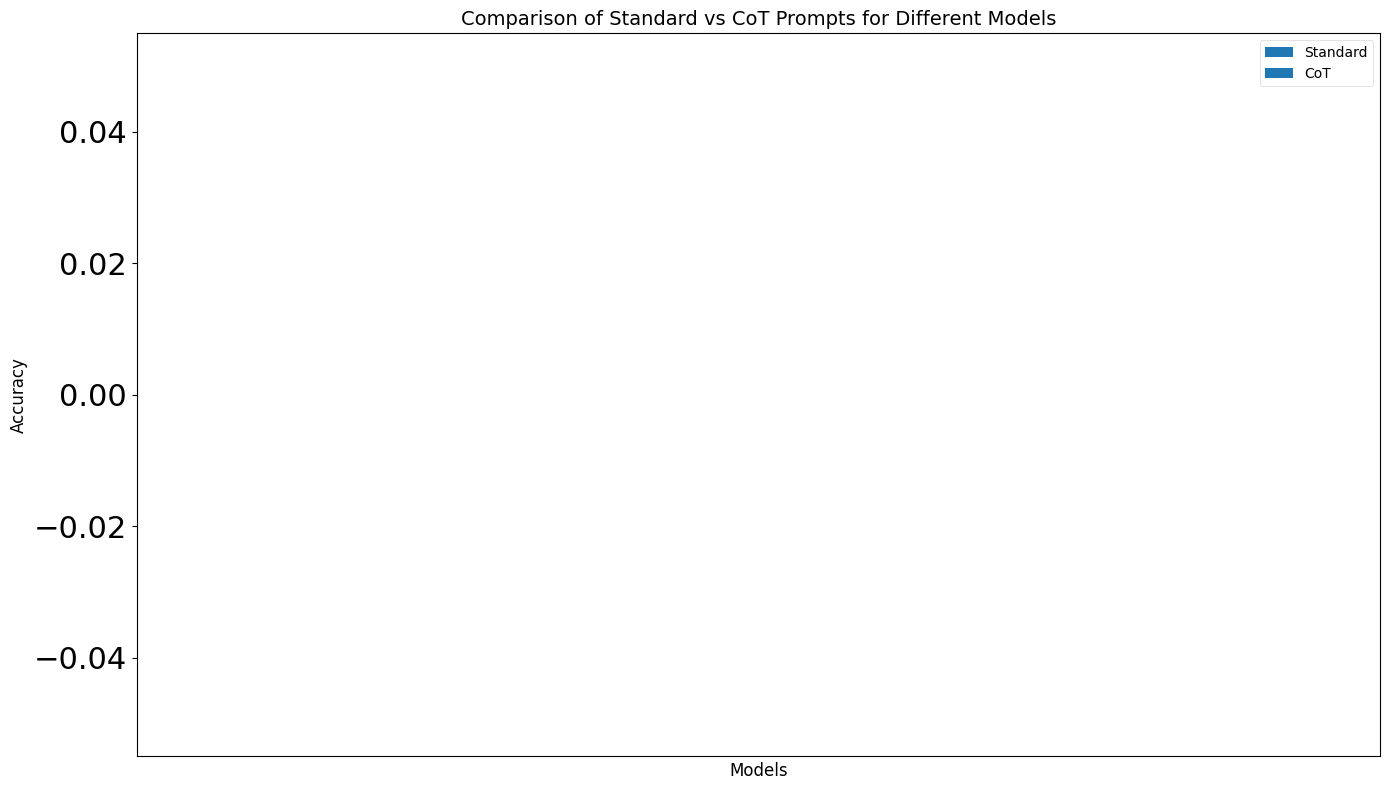

In [52]:
# Get data for standard and cot prompts
standard_df = get_row(dataset_name='ours_v2', prompt_name='standard', eval_mode='pairwise', description='')
cot_df = get_row(dataset_name='ours_v2', prompt_name='cot', eval_mode='pairwise', description='')

# Merge dataframes
merged_df = pd.merge(standard_df, cot_df, on='model_name', suffixes=('_standard', '_cot'))

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Set width of each bar and positions of the bars
bar_width = 0.35
r1 = np.arange(len(merged_df))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
ax.bar(r1, merged_df['accuracy_standard'], color='skyblue', width=bar_width, label='Standard')
ax.bar(r2, merged_df['accuracy_cot'], color='orange', width=bar_width, label='CoT')

# Customize the plot
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparison of Standard vs CoT Prompts for Different Models', fontsize=14)
ax.set_xticks([r + bar_width/2 for r in range(len(merged_df))])
ax.set_xticklabels(merged_df['model_name'], rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(merged_df['accuracy_standard']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(merged_df['accuracy_cot']):
    ax.text(i + bar_width, v, f'{v:.2f}', ha='center', va='bottom')

# Add legend
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
smp_all_df = get_row(dataset_name='ours_v2', prompt_name='standard', eval_mode='pairwise')

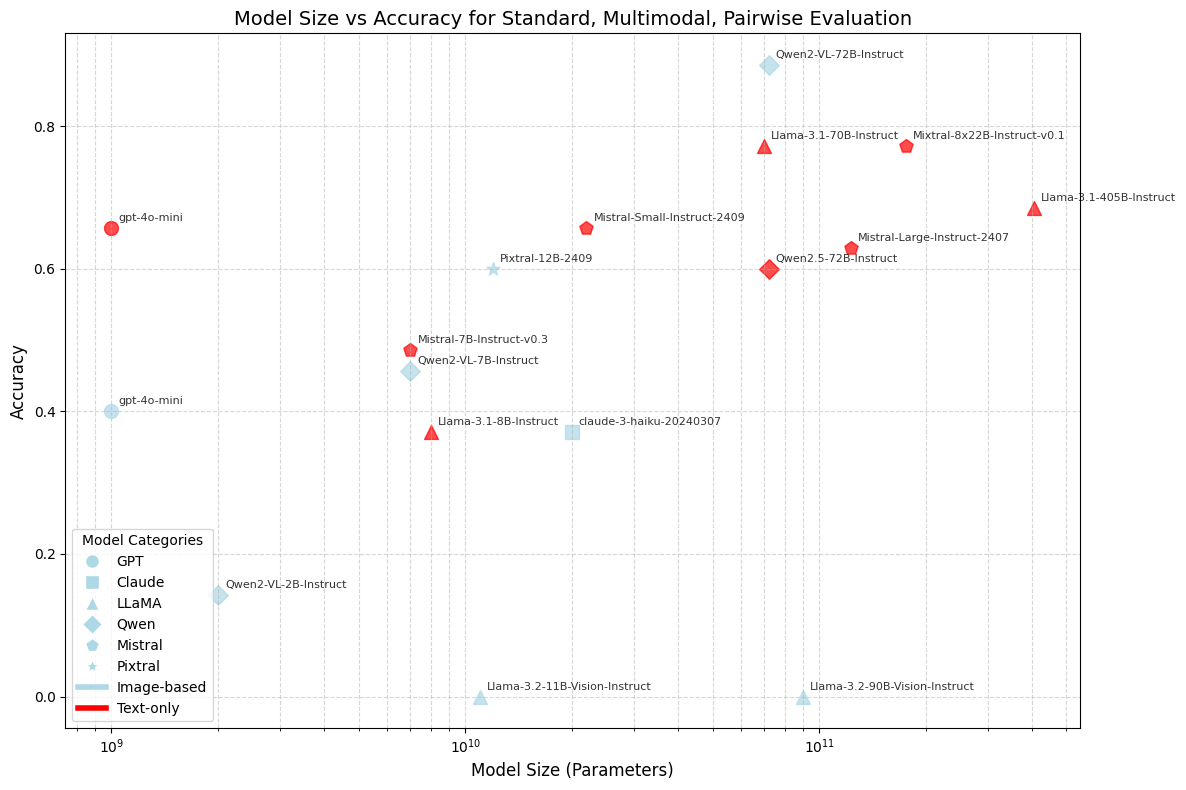

In [23]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for plotting
x_values = [model_size[model] for model in smp_all_df['model_name']]
y_values = smp_all_df['accuracy']
descriptions = smp_all_df['description']

# Define markers for each model category
markers = {
    'gpt': 'o',
    'claude': 's',
    'llama': '^',
    'qwen': 'D',
    'mistral': 'p',
    'pixtral': '*'
}

# Create scatter plots for each model category
for category in support_models:
    category_mask = [get_model_category(model) == category for model in smp_all_df['model_name']]
    x_category = [x for x, mask in zip(x_values, category_mask) if mask]
    y_category = [y for y, mask in zip(y_values, category_mask) if mask]
    models_category = [model for model, mask in zip(smp_all_df['model_name'], category_mask) if mask]
    descriptions_category = [desc for desc, mask in zip(descriptions, category_mask) if mask]
    
    # Separate data points based on description
    x_default = [x for x, desc in zip(x_category, descriptions_category) if desc == '']
    y_default = [y for y, desc in zip(y_category, descriptions_category) if desc == '']
    x_llama = [x for x, desc in zip(x_category, descriptions_category) if desc == 'Llama-3.2-90B-Vision-Instruct']
    y_llama = [y for y, desc in zip(y_category, descriptions_category) if desc == 'Llama-3.2-90B-Vision-Instruct']
    
    # Plot default description points
    scatter_default = ax.scatter(x_default, y_default, alpha=0.7, s=100, marker=markers[category], label=f"{category} (Default)", color = 'lightblue')
    
    # Plot Llama description points with a different color
    scatter_llama = ax.scatter(x_llama, y_llama, alpha=0.7, s=100, marker=markers[category], label=f"{category} (Llama)", color='red')
    
    # Annotate each point with the model name
    for x, y, model, desc in zip(x_category, y_category, models_category, descriptions_category):
        if desc == '' or desc == 'Llama-3.2-90B-Vision-Instruct':
            ax.annotate(model, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# Set x-axis to logarithmic scale
ax.set_xscale('log')

# Set labels and title
ax.set_xlabel('Model Size (Parameters)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Size vs Accuracy for Standard, Multimodal, Pairwise Evaluation', fontsize=14)

# Add grid lines
ax.grid(True, which="both", ls="--", alpha=0.5)

# Add legend
# Create custom legend entries
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='GPT', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', label='Claude', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', label='LLaMA', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='D', color='w', label='Qwen', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='p', color='w', label='Mistral', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='*', color='w', label='Pixtral', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], color='lightblue', lw=4, label='Image-based'),
    plt.Line2D([0], [0], color='red', lw=4, label='Text-only')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', title='Model Categories')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


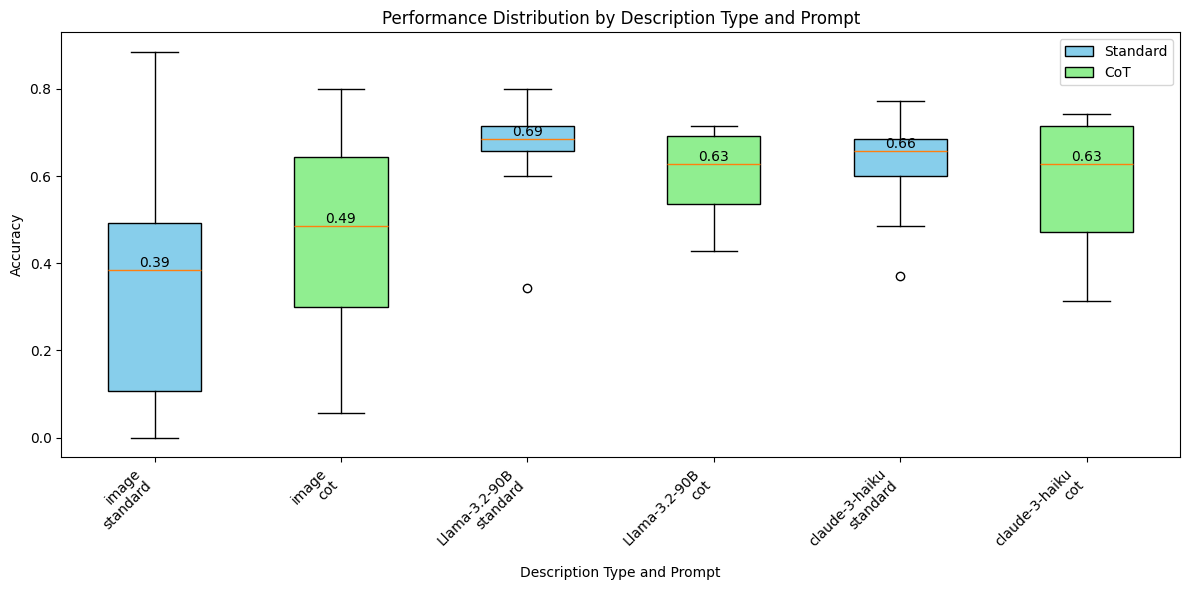

In [38]:
# Assuming df is your DataFrame with the data

# Prepare data for box plot
data_to_plot = [
    get_row(dataset_name='ours_v2', prompt_name=prompt, eval_mode='pairwise', description=desc)['accuracy'].dropna().tolist()
    for desc in df['description'].unique()
    for prompt in ['standard', 'cot']
]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot
bp = ax.boxplot(data_to_plot, patch_artist=True)

# Customize box colors
colors = ['skyblue', 'lightgreen'] * 3
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
ax.set_xlabel('Description Type and Prompt')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Distribution by Description Type and Prompt')

# Set x-axis labels
labels = [f"{desc}\n{prompt}" for desc in ['image', 'Llama-3.2-90B', 'claude-3-haiku'] for prompt in ['standard', 'cot']]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add a legend
ax.legend([bp['boxes'][0], bp['boxes'][1]], ['Standard', 'CoT'], loc='upper right')

# Show median values
medians = [np.median(data) for data in data_to_plot]
for i, median in enumerate(medians):
    ax.text(i+1, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [37]:
get_row(dataset_name='ours_v2', prompt_name='cot', eval_mode='pairwise', description = '')

,_runtime,_step,_timestamp,_wandb,accuracy,seed,wandb,api_key,eval_mode,overwrite,model_name,description,n_per_class,prompt_name,dataset_name,max_new_tokens,run_name,run_id
0,2.476578,0.0,1.728890e+09,{'runtime': 2},0.714286,42,True,yz,pairwise,False,gpt-4o-mini,,35,cot,ours_v2,NaN,lively-thunder-28,4fdrd3dr
1,195.974919,0.0,1.728935e+09,{'runtime': 195},0.428571,42,True,yz,pairwise,False,claude-3-haiku-20240307,,35,cot,ours_v2,NaN,radiant-firebrand-37,c6xzlz3x
2,67.714362,0.0,1.728965e+09,{'runtime': 67},0.057143,42,True,yz,pairwise,False,Llama-3.2-11B-Vision-Instruct,,35,cot,ours_v2,NaN,happy-moon-40,os7ua29v
3,901.291593,0.0,1.729028e+09,{'runtime': 901},0.171429,42,True,yz,pairwise,True,Qwen2-VL-2B-Instruct,,35,cot,ours_v2,1000.0,clear-deluge-58,73ss76ak
4,1121.171540,0.0,1.729031e+09,{'runtime': 1121},0.571429,42,True,yz,pairwise,True,Qwen2-VL-7B-Instruct,,35,cot,ours_v2,1000.0,denim-cloud-60,jfptk8hn
5,698.159204,0.0,1.729053e+09,{'runtime': 698},0.800000,42,True,yz,pairwise,False,Qwen2-VL-72B-Instruct,,35,cot,ours_v2,1000.0,lucky-meadow-69,9e8ji5hr
6,61.281952,0.0,1.729056e+09,{'runtime': 61},0.485714,42,True,yz,pairwise,False,Pixtral-12B-2409,,35,cot,ours_v2,1000.0,avid-dream-81,a5tvtm79
7,NaN,NaN,NaN,NaN,NaN,42,True,yz,pairwise,True,Llama-3.2-90B-Vision-Instruct,,35,cot,ours_v2,1000.0,vital-universe-124,lq4ju9d5
